In [1]:
import glob
import re
import os
import sys
import kipoi
import numpy as np
import datetime
import warnings
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats

['correlations', 'para', 'correlations', '17', '79885590', 'MAFG', 'csv', 'gz']


/home/antoine/mit_internship/miniconda3/envs/kipoi-DeepSEA__predict/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/home/antoine/mit_internship/miniconda3/envs/kipoi-DeepSEA__predict/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/home/antoine/mit_internship/miniconda3/envs/kipoi-DeepSEA__predict/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1789: RuntimeWarning: invalid value encountered in greater_equal
  cond2 = (x >= self.b) & cond0
/home/antoine/mit_internship/miniconda3/envs/kipoi-DeepSEA__predict/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1875: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


MAFG nan


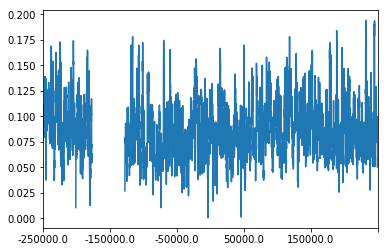

['correlations', 'para', 'correlations', '19', '42759309', 'ERF', 'csv', 'gz']
ERF nan


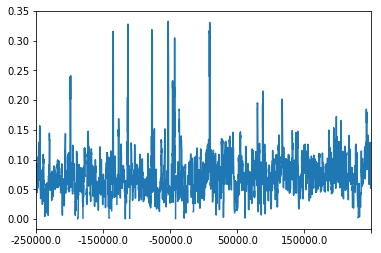

['correlations', 'para', 'correlations', '1', '2461684', 'HES5', 'csv', 'gz']
HES5 nan


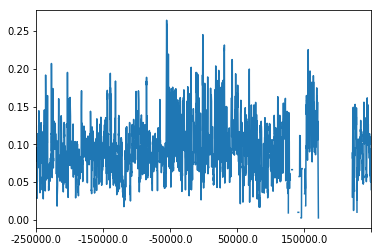

['correlations', 'para', 'correlations', '21', '44394620', 'PKNOX1', 'csv', 'gz']
PKNOX1 nan


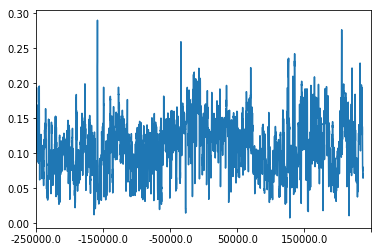

['correlations', 'para', 'correlations', '2', '63277192', 'OTX1', 'csv', 'gz']
OTX1 nan


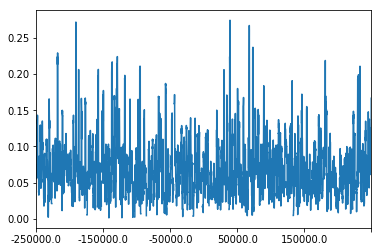

['correlations', 'para', 'correlations', '2', '97202480', 'ARID5A', 'csv', 'gz']
ARID5A nan


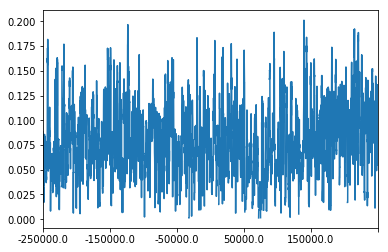

['correlations', 'para', 'correlations', '6', '31869769', 'ZBTB12', 'csv', 'gz']
ZBTB12 nan


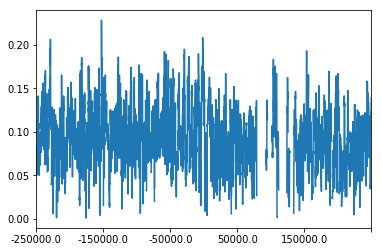

['correlations', 'para', 'correlations', '7', '4683388', 'FOXK1', 'csv', 'gz']
FOXK1 nan


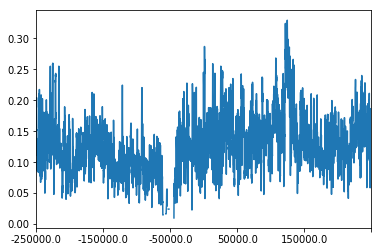

['correlations', 'para', 'correlations', '7', '50343720', 'IKZF1', 'csv', 'gz']
IKZF1 nan


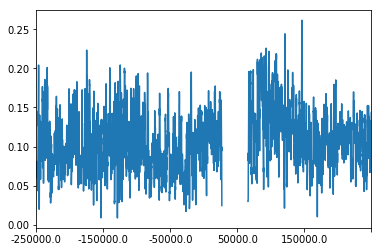

['correlations', 'para', 'correlations', 'X', '119249847', 'RHOXF1', 'csv', 'gz']
RHOXF1 nan


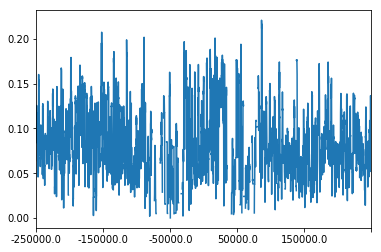

['correlations', 'para', 'correlations', 'X', '25034065', 'ARX', 'csv', 'gz']
ARX nan


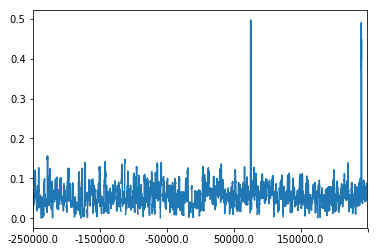

In [2]:
"""#sys.argv=["python_prediction.py","9_37034476",5000,"PAX5",1, 100, 500000]
sys.argv=["python_prediction.py","22_38597889",5000,"MAFF",1, 100, 500000]
sys.argv[4]=int(sys.argv[4])
sys.argv[5]=int(sys.argv[5])
sys.argv[6]=int(sys.argv[6])
#my_data = np.genfromtxt("correlations_para/correlations_"+sys.argv[1]+"_"+sys.argv[3]+".csv", delimiter=',')
#my_data = np.genfromtxt("~/link_epi_to_expr/correlations_done/correlations_"+sys.argv[1]+"_"+sys.argv[3]+".csv", delimiter=',')

#column_names = np.arange(sys.argv[4],sys.argv[6],sys.argv[5])-1-sys.argv[6]/2
#with open('deepsea_postprocessing/predictor.names') as f:
#    row_names = f.read().splitlines()
"""

list_of_genes=sorted(glob.glob("correlations_para/correlations_*_*_*.csv.gz"))
corr_parameters = {}
a=511
for i in list_of_genes:
    my_data = pd.read_csv(i, sep=',',header=0,index_col=0)
    i=i.replace('_','/').replace('.','/').split('/')
    print(i)
    sys.argv=["python_prediction.py",str(i[-5])+'_'+str(i[-4]),5000,i[-3],1, 100, 500000]
    corr_parameters[i[-3]] = my_data.abs().max().mean(),my_data.abs().max().std(),stats.anderson(my_data.abs().max())[0]
    print(i[-3], end=' ')
    print(stats.anderson(my_data.abs().max())[0])
    my_data.abs().max().plot()
    plt.show()
    #break

MAFG ERF HES5 PKNOX1 OTX1 ARID5A ZBTB12 FOXK1 IKZF1 RHOXF1 ARX 

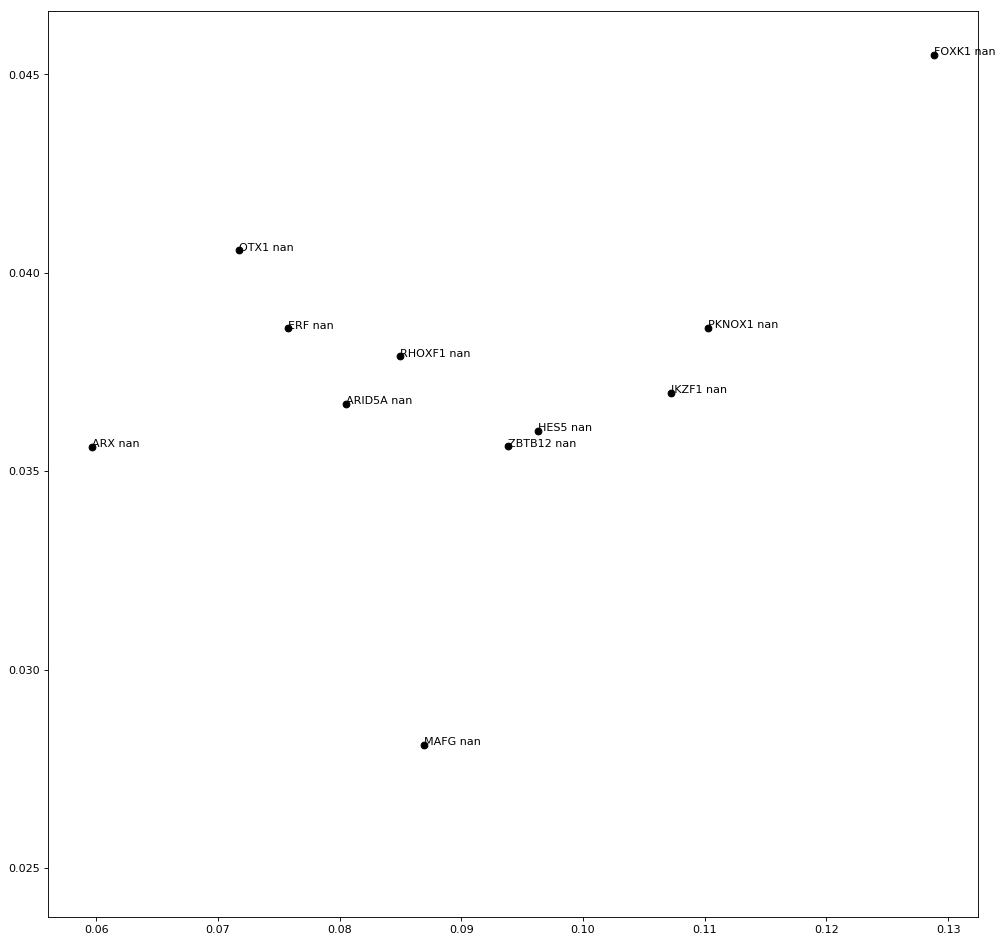

In [3]:
# print(corr_parameters)
plt.figure(num=None, figsize=(15, 15), dpi=80, facecolor='w', edgecolor='k')
ax = plt.subplot()
#for i in list_of_genes[0:2]:
for i in corr_parameters:
#    if corr_parameters[i][2]>40:
        ax.scatter(corr_parameters[i][0], corr_parameters[i][1],c='black')
        ax.annotate(i+" "+str(round(corr_parameters[i][2], 2)),(corr_parameters[i][0], corr_parameters[i][1]))
        print(i, end=' ')

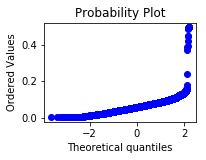

In [4]:
ax1 = plt.subplot(221)
res = stats.probplot(my_data.abs().max(), plot=plt)